In [4]:
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00


In [5]:
import pymysql
import pandas as pd
import numpy as np
from google.colab import data_table

In [6]:
data_table.enable_dataframe_formatter()

In [7]:
#Connect to MySQL database

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                              host='masscourtsplus.org',
                              database='wp_courtdocs') #REMEMBER LOGIN


cursor = cnx.cursor()
# more info here: https://docs.google.com/document/d/1aZKF0X7HjcXUYurD8uQYDpgo9wQdeJH4CMviBJeTYVc/edit#

In [8]:
query =  """
DESCRIBE cdocs_case_action_index;|

"""

In [9]:
# query for count of judges


query =  """
SELECT DISTINCT action
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'
LIMIT 20;

"""

%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [10]:
action_list= pd.DataFrame (results)
action_list

,0
0,Default
1,Judgment
2,Motion for default judgment
3,Motion to remove default
4,Default Removed
5,Motion allowed
6,Order Nisi for Dismissal
7,Motion to strike answer
8,Notice of potential default
9,Motion to vacate dismissal


In [11]:
# query for count of judges


query1 =  """
SELECT *
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'
ORDER BY case_id ASC

"""

%time

cursor.execute(query1) # executing query

results1 = cursor.fetchall() # fetching result

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [20]:
maindef= pd.DataFrame (results1)
maindef.info()
maindef

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488798 entries, 0 to 5488797
Data columns (total 8 columns):
 #   Column  Dtype         
---  ------  -----         
 0   0       int64         
 1   1       int64         
 2   2       object        
 3   3       object        
 4   4       object        
 5   5       object        
 6   6       int64         
 7   7       datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 335.0+ MB


In [21]:
uniq_maindef = maindef[1].nunique()
maindef_len = len(maindef)
print(maindef_len)
print(uniq_maindef)

5488798
1771530


In [22]:
# query for count of judges


query2 =  """
SELECT *
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'
AND action = 'Default'
ORDER BY case_id ASC

"""

%time

cursor.execute(query2) # executing query

results2 = cursor.fetchall() # fetching result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [23]:
totdef= pd.DataFrame (results2)
totdef.info()
totdef

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841320 entries, 0 to 841319
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   0       841320 non-null  int64         
 1   1       841320 non-null  int64         
 2   2       841320 non-null  object        
 3   3       841320 non-null  object        
 4   4       841320 non-null  object        
 5   5       841320 non-null  object        
 6   6       841320 non-null  int64         
 7   7       841320 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 51.4+ MB


,0,1,2,3,4,5,6,7
0,6239,5481,Court,Default,Default entered against D01 LEVI WARE.,2011-06-30 00:00:00,0,2023-03-28 22:55:55
1,8394,5481,Court,Default,Default entered against D01 LEVI WARE.,2011-08-04 00:00:00,0,2023-03-28 22:55:55
2,6253,5487,Court,Default,Default entered against D01 PAMELA NORMAN.,2011-06-30 00:00:00,0,2023-03-28 22:55:55
3,8396,5487,Court,Default,Default entered against D01 PAMELA NORMAN.,2011-08-04 00:00:00,0,2023-03-28 22:55:55
4,6285,5505,Court,Default,Default entered against D01 DEVAHN R. GEORGE.,2011-06-30 00:00:00,0,2023-03-28 22:55:55
...,...,...,...,...,...,...,...,...
841315,105877755,105768853,,Default,Judgment in SP by default,2024-02-15 00:00:00,0,2024-02-21 21:00:42
841316,105877760,105768865,,Default,Judgment in SP by default,2024-02-15 00:00:00,0,2024-02-21 21:00:42
841317,105877770,105801998,,Default,Judgment in SP by default,2024-02-16 00:00:00,0,2024-02-21 21:00:42
841318,105816429,105802061,,Default,Judgment in SP by default,2024-02-06 00:00:00,0,2024-02-09 20:21:31


In [24]:
uniq_totdef = totdef[1].nunique()
totdef_len = len(totdef)
print(totdef_len)
print(uniq_totdef)

841320
634977


In [25]:
# query for count of judges


query3 =  """
SELECT *
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'
AND action = 'Judgment'
ORDER BY case_id ASC


"""

%time

cursor.execute(query3) # executing query

results3 = cursor.fetchall() # fetching result

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


In [26]:
jud= pd.DataFrame (results3)
jud.info()
jud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543654 entries, 0 to 543653
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   0       543654 non-null  int64         
 1   1       543654 non-null  int64         
 2   2       543654 non-null  object        
 3   3       543654 non-null  object        
 4   4       543654 non-null  object        
 5   5       543654 non-null  datetime64[ns]
 6   6       543654 non-null  int64         
 7   7       543654 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 33.2+ MB


,0,1,2,3,4,5,6,7
0,6240,5481,Court,Judgment,"Judgment for P01 RAB PERFORMANCE RECOVERIES, L...",2011-06-30,0,2023-03-28 22:55:55
1,6254,5487,Court,Judgment,"Judgment for P01 MIDLAND FUNDING, LLC to recov...",2011-06-30,0,2023-03-28 22:55:55
2,6286,5505,Court,Judgment,"Judgment for P01 CAPITAL ONE BANK (USA), N.A. ...",2011-06-30,0,2023-03-28 22:55:55
3,6309,5515,Court,Judgment,"Judgment for P01 CLEAN WAY WASTE SERVICES, INC...",2011-06-30,0,2023-03-28 22:55:55
4,6358,5537,Court,Judgment,"Judgment for P01 CAPITAL ONE BANK, (USA)N.A. ...",2011-06-27,0,2023-03-28 22:55:55
...,...,...,...,...,...,...,...,...
543649,105877759,105768865,,Judgment,Judgment issued: Default Default (by Clerk)...,2024-02-15,0,2024-02-21 21:00:42
543650,105877769,105801998,,Judgment,Judgment issued: Default Default (by Clerk)...,2024-02-16,0,2024-02-21 21:00:42
543651,105816428,105802061,,Judgment,Judgment issued: Default Default (by Clerk)...,2024-02-06,0,2024-02-09 20:21:31
543652,105816447,105816431,,Judgment,Judgment issued: Default Default (by Clerk)...,2024-02-06,0,2024-02-09 20:21:31


In [27]:
uniq_jud = jud[1].nunique()
jud_len = len(jud)
print(jud_len)
print(uniq_jud)

543654
494663


In [28]:
# query for count of judges


query4 =  """
SELECT *
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'
AND action = 'Motion to remove default'
ORDER BY case_id ASC


"""

%time

cursor.execute(query4) # executing query

results4 = cursor.fetchall() # fetching result

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [29]:
mot_rm_def= pd.DataFrame (results4)
mot_rm_def.info()
mot_rm_def

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45482 entries, 0 to 45481
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       45482 non-null  int64         
 1   1       45482 non-null  int64         
 2   2       45482 non-null  object        
 3   3       45482 non-null  object        
 4   4       45482 non-null  object        
 5   5       45482 non-null  datetime64[ns]
 6   6       45482 non-null  int64         
 7   7       45482 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 2.8+ MB


,0,1,2,3,4,5,6,7
0,6697,6679,Defendant,Motion to remove default,Motion to remove default and file answer late ...,2011-06-21,0,2023-03-28 22:55:55
1,6698,6679,Defendant,Motion to remove default,Motion to remove default and file answer late ...,2011-06-23,0,2023-03-28 22:55:55
2,8413,6679,Defendant,Motion to remove default,Motion to remove default and file answer late ...,2011-06-28,0,2023-03-28 22:55:55
3,8334,8318,Defendant,Motion to remove default,Motion to remove default (Mass.R.Civ.P. 55[c])...,2011-07-12,0,2023-03-28 22:55:55
4,8905,8888,Defendant,Motion to remove default,Motion to remove default (Mass.R.Civ.P. 55[c])...,2010-12-01,0,2023-03-28 22:55:55
...,...,...,...,...,...,...,...,...
45477,105764046,105764014,Defendant,Motion to remove default,Motion by Christine Eliasz to remove default\n...,2023-11-08,0,2024-02-02 20:21:47
45478,105769240,105769228,Defendant,Motion to remove default,Motion by Ojuolape Mogaji to remove default,2024-01-25,0,2024-02-02 20:21:47
45479,105819030,105819022,Plaintiff,Motion to remove default,Motion by Mercede De Leon to remove default,2023-10-30,0,2024-02-10 19:54:52
45480,105850601,105819022,Plaintiff,Motion to remove default,Motion by Romeo Santo Linarez to remove default,2023-10-30,0,2024-02-15 20:26:48


In [40]:
uniq_mot_rm_def = mot_rm_def[1].nunique()
mot_rm_def_len = len(mot_rm_def)
print(mot_rm_def_len)
print(uniq_mot_rm_def)

45482
40885


In [39]:
# query for count of judges


query5 =  """
SELECT *
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'
AND action = 'Motion for default judgment'
ORDER BY case_id ASC


"""

%time

cursor.execute(query5) # executing query

results5 = cursor.fetchall() # fetching result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [41]:
def_jud= pd.DataFrame (results5)
def_jud.info()
def_jud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439113 entries, 0 to 439112
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   0       439113 non-null  int64         
 1   1       439113 non-null  int64         
 2   2       439113 non-null  object        
 3   3       439113 non-null  object        
 4   4       439113 non-null  object        
 5   5       439113 non-null  object        
 6   6       439113 non-null  int64         
 7   7       439113 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 26.8+ MB


,0,1,2,3,4,5,6,7
0,6668,6656,Plaintiff,Motion for default judgment,Application to clerk-magistrate to enter defau...,2011-06-01 00:00:00,0,2023-03-28 22:55:55
1,6669,6656,Plaintiff,Motion for default judgment,Application to clerk-magistrate for default ju...,2011-06-01 00:00:00,0,2023-03-28 22:55:55
2,6692,6679,Plaintiff,Motion for default judgment,Application to clerk-magistrate to enter defau...,2011-06-07 00:00:00,0,2023-03-28 22:55:55
3,6817,6805,Plaintiff,Motion for default judgment,Application to clerk-magistrate to enter defau...,2011-07-06 00:00:00,0,2023-03-28 22:55:55
4,6818,6805,Plaintiff,Motion for default judgment,Application to clerk-magistrate for default ju...,2011-07-06 00:00:00,0,2023-03-28 22:55:55
...,...,...,...,...,...,...,...,...
439108,102601256,102601243,Plaintiff,Motion for default judgment,Application to clerk-magistrate to enter defau...,2023-04-26 00:00:00,0,2023-09-14 20:20:25
439109,102601257,102601243,Plaintiff,Motion for default judgment,Application to clerk-magistrate for default ju...,2023-04-26 00:00:00,0,2023-09-14 20:20:25
439110,102602681,102602675,Defendant,Motion for default judgment,Application to clerk-magistrate to enter defau...,2023-04-28 00:00:00,0,2023-09-14 20:20:25
439111,102603804,102603796,Plaintiff,Motion for default judgment,Application to clerk-magistrate to enter defau...,2023-05-01 00:00:00,0,2023-09-14 20:20:25


In [42]:
uniq_def_jud = def_jud[1].nunique()
def_jud_len = len(def_jud)
print(def_jud_len)
print(uniq_def_jud)

439113
236568


In [43]:
# query for count of judges


query6 =  """
SELECT *
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'
AND action = 'Default Removed'
ORDER BY case_id ASC

"""

%time

cursor.execute(query6) # executing query

results6 = cursor.fetchall() # fetching result

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs


In [44]:
def_rmed= pd.DataFrame (results6)
def_rmed.info()
def_rmed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       2737 non-null   int64         
 1   1       2737 non-null   int64         
 2   2       2737 non-null   object        
 3   3       2737 non-null   object        
 4   4       2737 non-null   object        
 5   5       2737 non-null   datetime64[ns]
 6   6       2737 non-null   int64         
 7   7       2737 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 171.2+ KB


,0,1,2,3,4,5,6,7
0,6699,6679,Court,Default Removed,Default removed against D01 NGU HUYNH (Mass.R...,2011-06-23,0,2023-03-28 22:55:55
1,8909,8888,Court,Default Removed,Default removed against D01 ANGELA C. O'NEIL ...,2011-01-10,0,2023-03-28 22:55:55
2,10329,10300,Court,Default Removed,9-9-2011 Default removed against D01 ANAELE H...,2011-09-13,0,2023-03-28 22:55:55
3,26029,25983,Court,Default Removed,Default removed against Lawrence Movsessian (M...,2010-10-12,0,2023-03-28 22:55:55
4,31560,31528,Court,Default Removed,Default removed against Sephen C Ledogar (Mass...,2013-08-14,0,2023-03-28 22:55:55
...,...,...,...,...,...,...,...,...
2732,99655923,99655881,,Default Removed,Default removed against Mike Malloy A/K/A Mike...,2021-12-02,0,2023-09-14 20:20:25
2733,99738581,99738533,,Default Removed,Default removed against Balise Motor Sales Com...,2021-12-20,0,2023-09-14 20:20:25
2734,99759172,99759149,,Default Removed,Default removed against Letitia Vaughan (Mass....,2022-11-07,0,2023-09-14 20:20:25
2735,99878790,99878765,,Default Removed,Default Removed,2020-01-16,0,2023-09-14 20:20:25


In [45]:
uniq_def_rmed = def_rmed[1].nunique()
def_rmed_len = len(def_rmed)
print(def_rmed_len)
print(uniq_def_rmed)

2737
2595


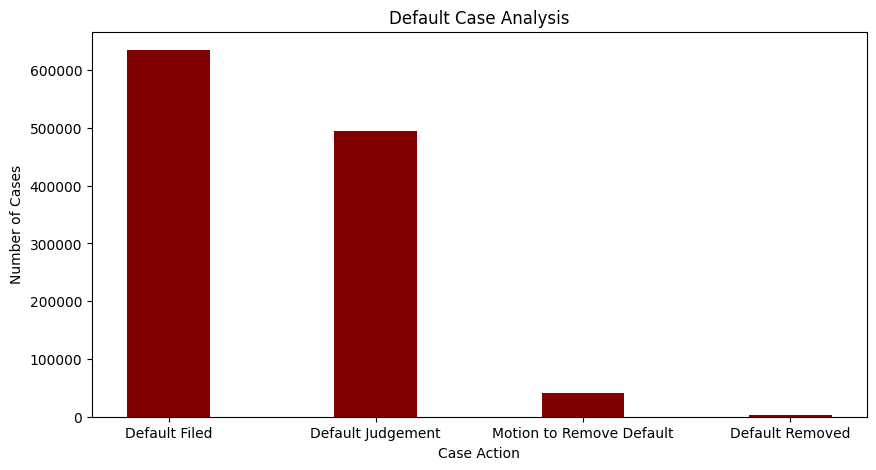

<Figure size 640x480 with 0 Axes>

In [56]:
import numpy as np
import matplotlib.pyplot as plt



# courses = ['Motion Default Judgement', 'Default', 'Judgement', 'Motion Remove Default', 'Default Removed']
# values = [uniq_def_jud, uniq_totdef, uniq_jud, uniq_mot_rm_def, uniq_def_rmed]

courses = ['Default Filed', 'Default Judgement', 'Motion to Remove Default', 'Default Removed']
values = [uniq_totdef, uniq_jud, uniq_mot_rm_def, uniq_def_rmed]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("Case Action")
plt.ylabel("Number of Cases")
plt.title("Default Case Analysis")
plt.show()
plt.savefig('default_cases.png')

The cdocs_case_action_index table from the wp_courtdocs database was analyzed for the entire time range starting from 2003 to the latest of 2023 to understand the condition of the total default cases. We investigated to find the number of total cases that file for judgment default (634977), receive default judgment (494663), the number of those cases that process to file a motion to remove default judgment (40885), and finally, the number of cases that get the default judgment revoked (2595).

As you can see from the bar plot and the numbers, while the number of cases that get filed for default judgment and receive the judgment are comparable, the number of instances that file motions to remove default judgment and eventually receive their default judgment revoked are significantly lower. The observations align with our assumption that most debtors might not have the resources to defend themselves legally. It opens up further questions that we would like to explore, such as:
What are the mean, maximum, and minimum debt values that go into default?
How many of those debtors get default judgment files for bankruptcy?
Who are the debtors who can successfully get their default motion revoked?
Are the most debtors individuals or organizations?
